In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
#dataset loaded
df = pd.read_csv('advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#Prepare the data and assign the X and y values
features = ['TV','Radio','Newspaper']
target = ['Sales']

X = df[features]
y = df[target]

In [6]:
X.shape

(200, 3)

In [7]:
y.shape

(200, 1)

In [8]:
# 3. Split the Data into Training and Testing Sets
# We train the model on one part of the data and test it on another

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

### Gradient Descent is too sensitive to our dataset like Tv and Radio both have different amount of values like 300 and 50 respectively so in order to remove the skeweness we will implement scaling feature to our data with mean 0 and standard deviation of 1 using:

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
import numpy as np

class GDRegressor:

    def __init__(self, learning_rate=0.01, epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        self.cost_history = []

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape
        y_train = y_train.to_numpy().ravel()  # ensure 1D

        self.intercept_ = 0
        self.coef_ = np.zeros(n_features)

        for _ in range(self.epochs):
            # Calculate the y_hat value
            y_hat = np.dot(X_train, self.coef_) + self.intercept_

            # Add the cost
            cost = np.mean((y_hat - y_train) ** 2)
            self.cost_history.append(cost) 

            # Gradients
            intercept_der = np.mean(y_hat - y_train)
            coef_der = np.dot((y_hat - y_train), X_train) / n_samples

            # Updates
            self.intercept_ -= self.lr * intercept_der
            self.coef_ -= self.lr * coef_der

        print(f"Final Intercept: {self.intercept_}")
        print(f"Final Coefficients: {self.coef_}")

    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_


In [12]:
gd = GDRegressor(0.1, 50)

In [13]:
gd.fit(X_train_scaled,y_train)

Final Intercept: 15.251614404962279
Final Coefficients: [4.5656072  1.46893644 0.11167196]


In [14]:
y_pred = gd.predict(X_test_scaled)

In [15]:
r2_score(y_test,y_pred)

0.9068735366612708

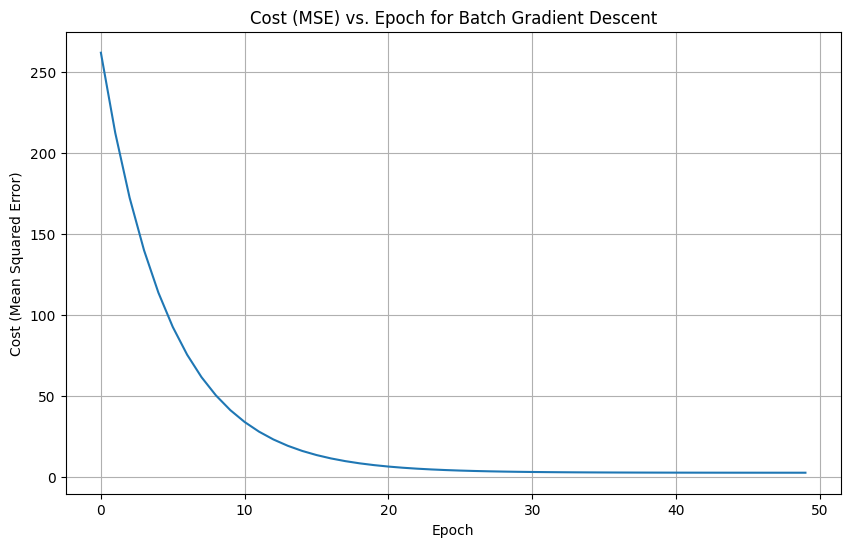

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(gd.epochs), gd.cost_history)
plt.title('Cost (MSE) vs. Epoch for Batch Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost (Mean Squared Error)')
plt.grid(True)
plt.show()

## Compare with the Linear Regression Model

In [17]:
lr = LinearRegression()

In [23]:
lr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = lr.predict(X_test_scaled)

In [26]:
r2_score(y_test,y_pred)

0.9059011844150826

## So, here we got almost similar values like 0.9068 and 09059.